<a href="https://colab.research.google.com/github/lukasbeckercode/TinyML_SineExample/blob/main/TinyML_Sine_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import dependencies
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

     |████████████████████████████████| 462 kB 3.9 MB/s 


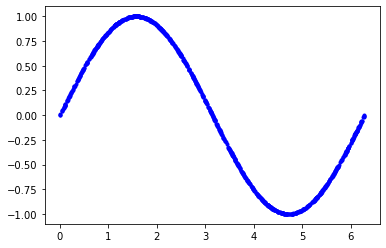

In [3]:
#Create clean sine sample data
# Prepare sine sample generation
SAMPLES = 1000
SEED = 6969
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate sample values 
x_vals = np.random.uniform(low=0,high=2*math.pi,size=SAMPLES)

# Make sure values are not in order
np.random.shuffle(x_vals)

# Generate corresponding y values 
y_vals = np.sin(x_vals)

# plot the results

plt.plot(x_vals, y_vals,'b.')
plt.show()

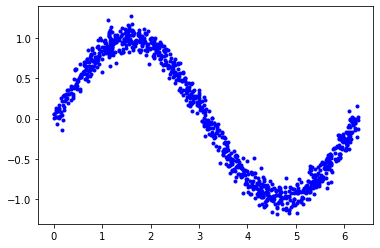

In [4]:
# add noise to previously generated data
y_vals += 0.1*np.random.randn(*y_vals.shape)
plt.plot(x_vals, y_vals,'b.')
plt.show()

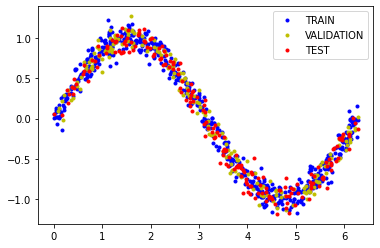

In [5]:
# splitting the data: 60% data, 20% test, 20% validation
# this calculates the inidces of this in the array
TRAIN_SPLIT= int(0.6*SAMPLES)
TEST_SPLIT = int(0.2*SAMPLES+TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_vals,[TRAIN_SPLIT,TEST_SPLIT]) 
y_train, y_validate, y_test = np.split(y_vals,[TRAIN_SPLIT,TEST_SPLIT]) 

#check splitting worked correctly
assert (x_train.size + x_validate.size+x_test.size) == SAMPLES

#plot the data 

plt.plot(x_train,y_train,'b.',label="TRAIN")
plt.plot(x_validate,y_validate,'y.', label="VALIDATION")
plt.plot(x_test,y_test,'r.',label="TEST")
plt.legend()
plt.show()

Training data is now generated. Now, the basic model gets defined

In [6]:
# Model definition
from tensorflow import keras
from tensorflow.keras import layers

model1 = tf.keras.Sequential()

model1.add(layers.Dense(16,activation='relu', input_shape=(1,)))

model1.add(layers.Dense(1))

model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


Definition is done, now we train the model

In [ ]:
history1 = model1.fit(x_train,y_train,batch_size=16,epochs=1000,validation_data=(x_validate,y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 7ms/step - loss: 0.5109 - mae: 0.5865 - val_loss: 0.4239 - val_mae: 0.5547
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3895 - mae: 0.5352 - val_loss: 0.3790 - val_mae: 0.5342
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3612 - mae: 0.5212 - val_loss: 0.3538 - val_mae: 0.5132
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3348 - mae: 0.5014 - val_loss: 0.3217 - val_mae: 0.4922
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3085 - mae: 0.4841 - val_loss: 0.2994 - val_mae: 0.4731
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2858 - mae: 0.4651 - val_loss: 0.2687 - val_mae: 0.4544
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2663 - mae: 0.4515 - val_loss: 0.2505 - val_mae: 0.4370
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.

1st epoch: 
- loss: 0.5113 
- mae: 0.5882 
- val_loss: 0.4285 
- val_mae: 0.5567

Last epoch: 
 - loss: 0.1551 
 - mae: 0.3085 
 - val_loss: 0.1321 
 - val_mae: 0.2823

 This model has bad mae value, plus loss and val_loss are too close to each other

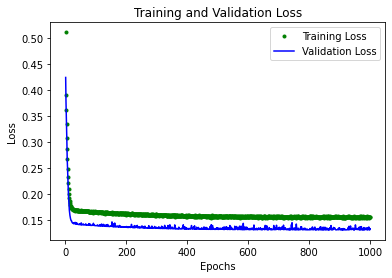

In [ ]:
# find reason why the model isn't what we want yet

loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'g.', label="Training Loss")
plt.plot(epochs,val_loss,'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


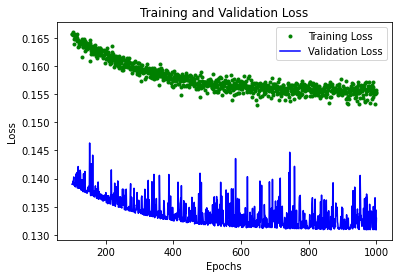

In [ ]:

# find reason why the model isn't what we want yet, remove the first 100 epochs
SPLIT=100

plt.plot(epochs[SPLIT:],loss[SPLIT:],'g.', label="Training Loss")
plt.plot(epochs[SPLIT:],val_loss[SPLIT:],'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

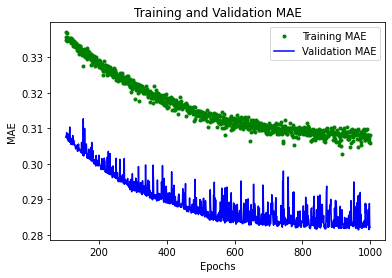

In [ ]:

# find reason why the model isn't what we want yet, plot mae now
SPLIT=100

mae= history1.history['mae']
val_mae= history1.history['val_mae']

plt.plot(epochs[SPLIT:],mae[SPLIT:],'g.', label="Training MAE")
plt.plot(epochs[SPLIT:],val_mae[SPLIT:],'b', label="Validation MAE")
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

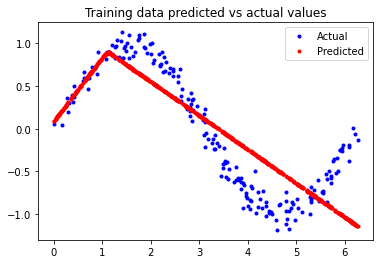

In [ ]:
#plot predication vs actual values
prediction = model1.predict(x_train)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_train,prediction,'r.',label='Predicted')
plt.legend()
plt.show()

from the last plot, it becomes clear that this model cannot learn to approximate the sinewave well enough, so lets make some improvements

In [7]:

model2 = tf.keras.Sequential()

model2.add(layers.Dense(16,activation='relu', input_shape=(1,)))

model2.add(layers.Dense(16,activation='relu'))

model2.add(layers.Dense(1))

model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train second model now

history2 = model2.fit(x_train,y_train,batch_size=16,epochs=600,validation_data=(x_validate,y_validate))

Epoch 1/600
38/38 [==============================] - 1s 7ms/step - loss: 0.4001 - mae: 0.5441 - val_loss: 0.3673 - val_mae: 0.5290
Epoch 2/600
38/38 [==============================] - 0s 3ms/step - loss: 0.3223 - mae: 0.4931 - val_loss: 0.2805 - val_mae: 0.4611
Epoch 3/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2604 - mae: 0.4452 - val_loss: 0.2394 - val_mae: 0.4188
Epoch 4/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2180 - mae: 0.4054 - val_loss: 0.1875 - val_mae: 0.3762
Epoch 5/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1840 - mae: 0.3743 - val_loss: 0.1622 - val_mae: 0.3442
Epoch 6/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1650 - mae: 0.3508 - val_loss: 0.1370 - val_mae: 0.3179
Epoch 7/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1537 - mae: 0.3360 - val_loss: 0.1310 - val_mae: 0.3018
Epoch 8/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1463 - m

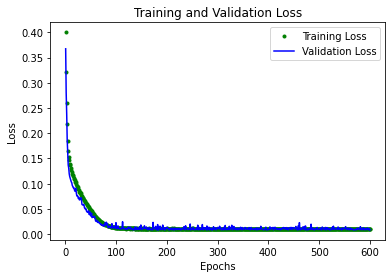

In [9]:
# Looks way better now


loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'g.', label="Training Loss")
plt.plot(epochs,val_loss,'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:

plt.plot(epochs[SPLIT:],loss[SPLIT:],'g.', label="Training Loss")
plt.plot(epochs[SPLIT:],val_loss[SPLIT:],'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

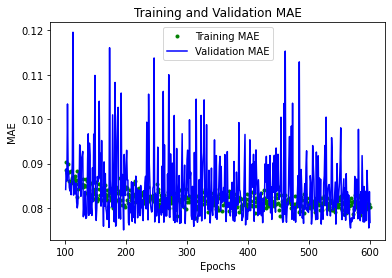

In [ ]:

plt.clf()

mae= history2.history['mae']
val_mae= history2.history['val_mae']

plt.plot(epochs[SPLIT:],mae[SPLIT:],'g.', label="Training MAE")
plt.plot(epochs[SPLIT:],val_mae[SPLIT:],'b', label="Validation MAE")
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step - loss: 0.0117 - mae: 0.0881


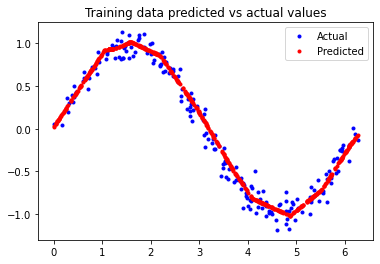

In [11]:
#plot predication vs actual values
loss = model2.evaluate(x_test,y_test)

prediction = model2.predict(x_train)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_train,prediction,'r.',label='Predicted')
plt.legend()
plt.show()

Model looks fine now. The next step is to convert it into a TF Lite Model. We create two models here: One without any optimization and one with quantization where weights and biases are changed from 32 bit floats to 8 bit ints 

In [16]:
# Without optimizations
converter = tf.lite.TFLiteConverter.from_keras_model(model=model2)
tflite_model = converter.convert()

# Save model to disk
open("sine_model.tflite","wb").write(tflite_model)

# With quantization 
converter = tf.lite.TFLiteConverter.from_keras_model(model=model2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def rep_dataset_gen():
  for v in x_test: 
    yield [np.array(v,dtype=np.float32, ndmin=2)]

converter.representative_dataset = rep_dataset_gen

tflite_model = converter.convert()

open("sine_model_op.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp1xbj75vp/assets


INFO:tensorflow:Assets written to: /tmp/tmp1xbj75vp/assets


INFO:tensorflow:Assets written to: /tmp/tmpcqp495g7/assets


INFO:tensorflow:Assets written to: /tmp/tmpcqp495g7/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


2752

Check if the generated models still are accurate. TF Lite interpretor is used for this

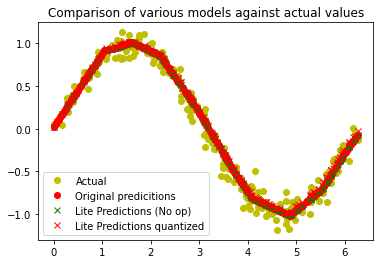

In [27]:
#create interpreter for each model 

sine_model = tf.lite.Interpreter("sine_model.tflite")
sine_model_optimized = tf.lite.Interpreter("sine_model_op.tflite")

#Allocate memory

sine_model.allocate_tensors()
sine_model_optimized.allocate_tensors()

#get indexes of input and output tensors
sine_model_in_index = sine_model.get_input_details()[0]['index']
sine_model_out_index = sine_model.get_output_details()[0]['index']

sine_model_op_in_index = sine_model_optimized.get_input_details()[0]['index']
sine_model_op_out_index = sine_model_optimized.get_output_details()[0]['index']

#create array to save predictions to
sine_model_predictions = []
sine_model_op_predictions = []

#run models, store results in the arrays
for x in x_test: 
  x_tensor = tf.convert_to_tensor([[x]],dtype=np.float32)
  #non optimized model
  sine_model.set_tensor(sine_model_in_index, x_tensor)
  sine_model.invoke() 
  sine_model_predictions.append(sine_model.get_tensor(sine_model_out_index)[0])
  #optimized model
  sine_model_optimized.set_tensor(sine_model_in_index,x_tensor)
  sine_model_optimized.invoke()
  sine_model_op_predictions.append(sine_model_optimized.get_tensor(sine_model_op_out_index)[0])

#plot the data 

plt.clf() 
plt.title('Comparison of various models against actual values')
plt.plot(x_test,y_test,"yo", label='Actual')
plt.plot(x_train,prediction,'ro',label='Original predicitions')
plt.plot(x_test,sine_model_predictions,'gx', label='Lite Predictions (No op)')
plt.plot(x_test,sine_model_op_predictions,'rx', label='Lite Predictions quantized')
plt.legend()
plt.show()

In this above comparison, we can see that both the models are very close to the original model. <br /> 
Now, let's compare the difference in size between the models

In [28]:
import os 
basic_model_size = os.path.getsize('sine_model.tflite')
op_model_size = os.path.getsize('sine_model_op.tflite')

diff = basic_model_size - op_model_size

print(f"Basic model is {basic_model_size} bytes")
print(f"Quantized model is {op_model_size} bytes")
print(f"Difference is {diff} bytes")

Basic model is 2932 bytes
Quantized model is 2752 bytes
Difference is 180 bytes


Let's now use the optimized model and convert it to a C file so it can be used directly in the Microcontrollers memory

In [29]:
# Install xxd to be able to convert
!apt-get -qq install xxd

# Save file as C source file
!xxd -i sine_model_op.tflite > sine_model_quantized.cc

#print file for verification
!cat sine_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char sine_model_op_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x38, 0x01, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0xe0, 0x00, 0x00, 0x00,
  0x58, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x38, 0x05, 0x00, 0x00,
  0x44, 0x04, 0x00, 0x00, 0xe8, 0x01, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x38, 0x01, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x60, 0x0a, 0x00, 0x00,
  0x5c, 0x0a, 0x00, 0x00, 0x48, 0x09, 0x00, 